In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print(tf.__version__)

2021-07-18 20:10:31.648038: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:
2021-07-18 20:10:31.648082: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using TensorFlow backend.


2.5.0


In [2]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, GlobalAveragePooling2D, Layer, Dense, Dropout, Input, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers

In [3]:
import os
path = '../dataset/sharma_59_nih_dataset/Image_dataset'
os.listdir(path)

['0_0', '1_1']

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(path,image_size=(224, 224))
dataset

Found 11452 files belonging to 2 classes.


2021-07-16 07:40:43.806344: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-16 07:40:43.923522: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:04:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2021-07-16 07:40:43.927601: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:06:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2021-07-16 07:40:43.932459: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:07:00.0 name: GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [5]:
test_dataset = dataset.take(75)
train_dataset = dataset.skip(75)

valid_dataset = test_dataset.take(25)
test_dataset = test_dataset.skip(25)

# test = 32 x 50 = 1600 images, valid = 32 x 25 = 800 images

# Training and testing of models


Mobile Net v2 model

In [6]:
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
                   trainable=False),
    Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.build([None, 224, 224, 3])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 32)                40992     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,299,009
Trainable params: 41,025
Non-trainable params: 2,257,984
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
his = model.fit(train_dataset, validation_data=valid_dataset, epochs = 50)

Epoch 1/50
308/308 [==============================] - 43s 133ms/step - loss: 0.6284 - accuracy: 0.6495 - val_loss: 0.6462 - val_accuracy: 0.6219
Epoch 2/50
308/308 [==============================] - 41s 131ms/step - loss: 0.6276 - accuracy: 0.6447 - val_loss: 0.6552 - val_accuracy: 0.5938
Epoch 3/50
308/308 [==============================] - 40s 130ms/step - loss: 0.6218 - accuracy: 0.6548 - val_loss: 0.6430 - val_accuracy: 0.6094
Epoch 4/50
308/308 [==============================] - 41s 130ms/step - loss: 0.6201 - accuracy: 0.6533 - val_loss: 0.6195 - val_accuracy: 0.6687
Epoch 5/50
308/308 [==============================] - 40s 130ms/step - loss: 0.6203 - accuracy: 0.6558 - val_loss: 0.6233 - val_accuracy: 0.6625
Epoch 6/50
308/308 [==============================] - 41s 131ms/step - loss: 0.6159 - accuracy: 0.6618 - val_loss: 0.6295 - val_accuracy: 0.6281
Epoch 7/50
308/308 [==============================] - 40s 130ms/step - loss: 0.6132 - accuracy: 0.6625 - val_loss: 0.6396 - val_ac

In [10]:
loss, acc = model.evaluate(test_dataset)
acc

40/40 [==============================] - 5s 126ms/step - loss: 0.7257 - accuracy: 0.6195


0.6195312738418579

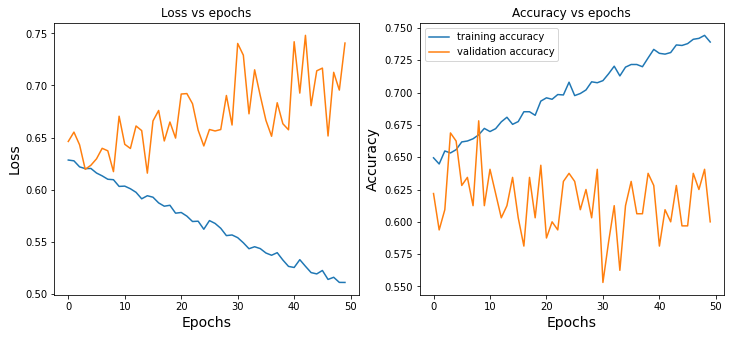

In [11]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))

axes[0].set_xlabel("Epochs", fontsize=14)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].set_title('Loss vs epochs')
axes[0].plot(his.history['loss'], label = 'training loss')
axes[0].plot(his.history['val_loss'], label = 'validation loss')

axes[1].set_title('Accuracy vs epochs')
axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epochs", fontsize=14)
axes[1].plot(his.history['accuracy'], label = 'training accuracy')
axes[1].plot(his.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

In [7]:
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
                   trainable=True),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.build([None, 224, 224, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(patience=6, monitor='val_accuracy', restore_best_weights=True)
his = model.fit(train_dataset, validation_data=valid_dataset, epochs = 30, callbacks = [early_stop])

Epoch 1/30


2021-07-10 14:44:08.574429: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-10 14:44:08.900505: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2199895000 Hz


283/283 [==============================] - 265s 911ms/step - loss: 0.7156 - accuracy: 0.6626 - val_loss: 0.7541 - val_accuracy: 0.6662
Epoch 2/30
283/283 [==============================] - 249s 878ms/step - loss: 0.6781 - accuracy: 0.6919 - val_loss: 0.7100 - val_accuracy: 0.6825
Epoch 3/30
283/283 [==============================] - 250s 883ms/step - loss: 0.6635 - accuracy: 0.7004 - val_loss: 0.7123 - val_accuracy: 0.6587
Epoch 4/30
283/283 [==============================] - 250s 881ms/step - loss: 0.6461 - accuracy: 0.7151 - val_loss: 1.0899 - val_accuracy: 0.5950
Epoch 5/30
283/283 [==============================] - 248s 873ms/step - loss: 0.6297 - accuracy: 0.7286 - val_loss: 0.9560 - val_accuracy: 0.5537
Epoch 6/30
283/283 [==============================] - 249s 879ms/step - loss: 0.6193 - accuracy: 0.7393 - val_loss: 0.8643 - val_accuracy: 0.6237
Epoch 7/30
283/283 [==============================] - 248s 876ms/step - loss: 0.6097 - accuracy: 0.7417 - val_loss: 1.4613 - val_accura

In [9]:
loss, acc = model.evaluate(test_dataset)
acc

50/50 [==============================] - 5s 105ms/step - loss: 0.7003 - accuracy: 0.6806


0.6806250214576721

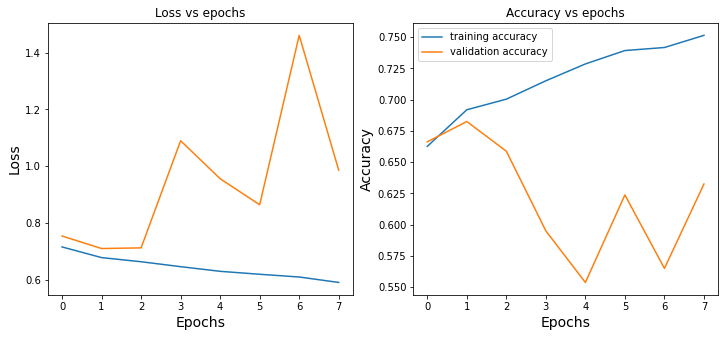

In [10]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))

axes[0].set_xlabel("Epochs", fontsize=14)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].set_title('Loss vs epochs')
axes[0].plot(his.history['loss'], label = 'training loss')
axes[0].plot(his.history['val_loss'], label = 'validation loss')

axes[1].set_title('Accuracy vs epochs')
axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epochs", fontsize=14)
axes[1].plot(his.history['accuracy'], label = 'training accuracy')
axes[1].plot(his.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

In [6]:
from tensorflow.keras.applications.densenet import DenseNet121

base_model = DenseNet121(include_top = False)
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [7]:
model = Sequential([
    DenseNet121(include_top = False),
    GlobalAveragePooling2D(),
    Dense(1, activation = 'sigmoid')
])

In [8]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)
his = model.fit(train_dataset, validation_data=valid_dataset, epochs = 5, callbacks = [early_stop])

Epoch 1/5


2021-07-11 12:27:26.406522: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-11 12:27:26.468515: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2199895000 Hz


283/283 [==============================] - 1026s 4s/step - loss: 0.6651 - accuracy: 0.6252 - val_loss: 0.7672 - val_accuracy: 0.5688
Epoch 2/5
283/283 [==============================] - 1452s 5s/step - loss: 0.6255 - accuracy: 0.6534 - val_loss: 0.8057 - val_accuracy: 0.5763
Epoch 3/5
283/283 [==============================] - 1652s 6s/step - loss: 0.6123 - accuracy: 0.6694 - val_loss: 0.6456 - val_accuracy: 0.6300
Epoch 4/5
283/283 [==============================] - 1370s 5s/step - loss: 0.6058 - accuracy: 0.6805 - val_loss: 0.8153 - val_accuracy: 0.5575
Epoch 5/5
283/283 [==============================] - 1179s 4s/step - loss: 0.6109 - accuracy: 0.6769 - val_loss: 12.6444 - val_accuracy: 0.4863


In [9]:
loss, acc = model.evaluate(test_dataset)
acc

50/50 [==============================] - 19s 375ms/step - loss: 12.6516 - accuracy: 0.4919


0.4918749928474426

In [6]:
class ResidualBlock(Layer):

    def __init__(self, **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        
    def build(self, input_shape):
        
        self.bn1 = tf.keras.layers.BatchNormalization(input_shape = input_shape)
        self.conv1 = tf.keras.layers.Conv2D(input_shape[-1], kernel_size= (3,3), padding= 'same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(input_shape[-1], kernel_size= (3,3), padding= 'same')
        
    def call(self, inputs, training=False):
        
        x = self.bn1(inputs, training = training)
        x = tf.nn.relu(x)
        x = self.conv1(x)
        
        x = self.bn2(x, training = training)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        return(x)

In [7]:
class FiltersChangeResidualBlock(Layer):

    def __init__(self, out_filters, **kwargs):
        
        super(FiltersChangeResidualBlock, self).__init__(**kwargs)
        self.out_filters = out_filters
        
    def build(self, input_shape):
        
        self.bn1 = tf.keras.layers.BatchNormalization(input_shape = input_shape)
        self.conv1 = tf.keras.layers.Conv2D(input_shape[-1], kernel_size= (3,3), padding= 'same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(self.out_filters, kernel_size= (3,3), padding= 'same')
        self.conv3 = tf.keras.layers.Conv2D(self.out_filters, kernel_size = (1,1))
        
    def call(self, inputs, training=False):
        
        x = self.bn1(inputs, training = training)
        x = tf.nn.relu(x)
        x = self.conv1(x)
        
        x = self.bn2(x, training = training)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = self.conv3(x)
        return(x)

In [8]:
from tensorflow.keras.models import Model
class ResNetModel(Model):

    def __init__(self, **kwargs):
        super(ResNetModel, self).__init__(**kwargs)
        self.conv1 = tf.keras.layers.Conv2D(32, kernel_size= (7,7), strides=2)
        self.residual = ResidualBlock() 
        self.conv2 = tf.keras.layers.Conv2D(32, kernel_size=(3,3))
        self.fcrb = FiltersChangeResidualBlock(64)
        self.flatten = Flatten()
        self.dense = tf.keras.layers.Dense(1, activation = 'sigmoid')
        
    def call(self, inputs, training=False):

        x = self.conv1(inputs)
        x = self.residual(x, training = training)
        x = self.conv2(x)
        x = self.fcrb(x, training = training)
        x = self.flatten(x)
        x = self.dense(x)
        return(x)

In [ ]:
resnet_model = ResNetModel()
resnet_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
his = resnet_model.fit(dataset, validation_data=valid_dataset, epochs = 25)

Epoch 1/25


2021-07-16 07:42:09.811565: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-16 07:42:09.836677: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2199895000 Hz


358/358 [==============================] - 588s 2s/step - loss: 1.9921 - accuracy: 0.5366 - val_loss: 1.0496 - val_accuracy: 0.5462
Epoch 2/25
358/358 [==============================] - 585s 2s/step - loss: 1.0466 - accuracy: 0.5706 - val_loss: 1.2554 - val_accuracy: 0.5462
Epoch 3/25
358/358 [==============================] - 582s 2s/step - loss: 0.9966 - accuracy: 0.5884 - val_loss: 1.4562 - val_accuracy: 0.5000
Epoch 4/25
358/358 [==============================] - 580s 2s/step - loss: 0.8788 - accuracy: 0.6043 - val_loss: 0.7126 - val_accuracy: 0.6225
Epoch 5/25
358/358 [==============================] - 511s 1s/step - loss: 0.7482 - accuracy: 0.6573 - val_loss: 0.9438 - val_accuracy: 0.5900
Epoch 6/25
358/358 [==============================] - 433s 1s/step - loss: 0.6074 - accuracy: 0.7144 - val_loss: 0.6135 - val_accuracy: 0.6938
Epoch 7/25
358/358 [==============================] - 432s 1s/step - loss: 0.5351 - accuracy: 0.7568 - val_loss: 0.5345 - val_accuracy: 0.7287
Epoch 8/25

In [ ]:
resnet_model.summary()